In [1]:
%pip install -U sentence-transformers

  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/470.2 kB ? eta -:--:--
   ---------------------------------------  460.8/470.2 kB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 470.2/470.2 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.8 MB 13.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/10.8 MB 11.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/10.8 MB 11.0 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.8 MB 11.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.8 MB 10.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/10.8 MB 10.3 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/10.8 MB 10.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/10.8 MB 10.7 MB/s eta 0:00:01


  You can safely remove it manually.


In [2]:
import pandas as pd
flat_table = pd.read_csv("../data/clean/clean_Flat_Table.csv")
hs_tree = pd.read_csv("../data/clean/clean_HS_Tree.csv")

In [4]:
from sentence_transformers import SentenceTransformer

In [5]:
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(hs_tree['description'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/217 [00:00<?, ?it/s]

In [6]:
np.save("../data/clean/hs_tree_embeddings.npy", embeddings)


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

hs_tree['pca_1'] = pca_result[:,0]
hs_tree['pca_2'] = pca_result[:,1]


In [8]:
from sklearn.cluster import KMeans


In [9]:
kmeans = KMeans(n_clusters=10, random_state=42)
hs_tree['cluster'] = kmeans.fit_predict(embeddings)


c:\Users\varsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
hs_tree.to_csv("../data/clean/hs_tree_with_clusters.csv", index=False)


In [17]:
import joblib

joblib.dump(kmeans, "../models/kmeans_tfidf.pkl")

['../models/kmeans_tfidf.pkl']

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA of Description Embeddings with KMeans Clusters')

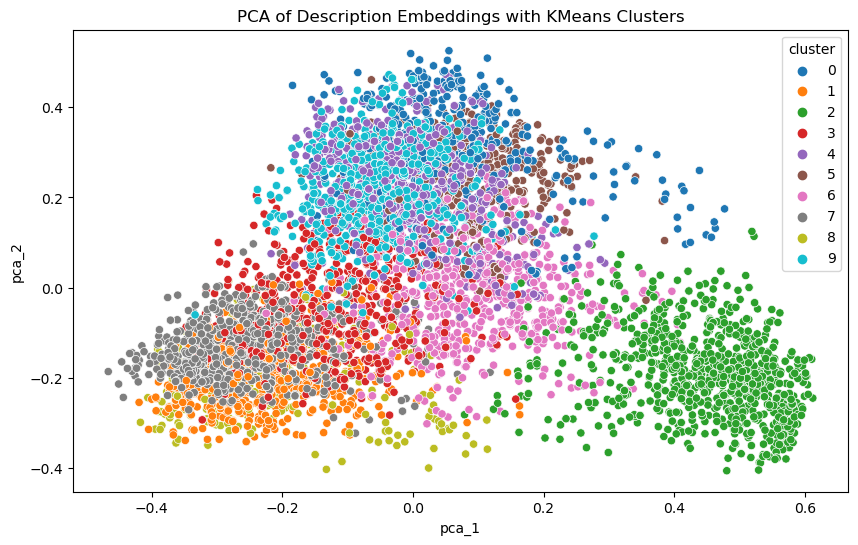

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="pca_1", y="pca_2", hue="cluster", data=hs_tree, palette='tab10')
plt.title("PCA of Description Embeddings with KMeans Clusters")


In [12]:
plt.savefig("../outputs/plots/desc_clusters.png")

<Figure size 640x480 with 0 Axes>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features=500)
X_tfidf = tfidf.fit_transform(hs_tree['description'])

In [14]:
for c in range(10):
    cluster_descs = hs_tree[hs_tree['cluster'] == c]['description']
    tfidf_cluster = tfidf.fit_transform(cluster_descs)
    indices = np.argsort(tfidf.idf_)[::1][:5]
    top_terms = [tfidf.get_feature_names_out()[i] for i in indices]
    print(f"Cluster {c}: {top_terms}")

Cluster 0: ['machines', 'machinery', 'working', 'machinetools', 'metal']
Cluster 1: ['fresh', 'containing', 'vegetable', 'dried', 'edible']
Cluster 2: ['fibres', 'fabrics', 'cotton', 'knitted', 'crocheted']
Cluster 3: ['waste', 'containing', 'scrap', 'nec', 'including']
Cluster 4: ['heading', 'parts', 'nec', 'exceeding', 'vehicles']
Cluster 5: ['steel', 'iron', 'nonalloy', 'flatrolled', 'width']
Cluster 6: ['sheets', 'paper', 'paperboard', 'wood', 'heading']
Cluster 7: ['derivatives', 'salts', 'containing', 'halogenated', 'acyclic']
Cluster 8: ['fish', 'meat', 'fresh', 'offal', 'edible']
Cluster 9: ['apparatus', 'parts', 'excluding', 'instruments', 'heading']
